# 1.6. Implementing a Multi Layer Perceptron (Artificial Neural Network

## Imports

In [ ]:
import numpy as np # conda install numpy
import tensorflow as tf 
import matplotlib.pyplot as plt # conda install matplotlib
import pandas as pd # conda install pandas
import warnings
import seaborn as sns # conda install seaborn

warnings.filterwarnings('ignore')

print(tf.__version__)

## Load data and take a look at it

In [ ]:
data = pd.read_csv('airbnb new york.csv').sample(frac=1)
data.describe()

## Data preprocessing

In [ ]:
features = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 
                 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
#print(features.isna().sum())
features['reviews_per_month'] = features['reviews_per_month'].fillna(0)
#print(features.isna().sum())

onehot_neighborhood_group = pd.get_dummies(features['neighbourhood_group'])
onehot_room_type = pd.get_dummies(features['room_type'])
#print(onehot_room_type)

features = features.drop(columns=['neighbourhood_group', 'room_type'])
features = pd.concat([features, onehot_neighborhood_group, onehot_room_type], axis=1)
#print(features.head())

targets = data['price']

train_size = int(0.7*len(data))
X_train, X_test = features.values[:train_size, :], features.values[train_size:, :]
y_train, y_test = targets.values[:train_size], targets.values[train_size:]

print(len(X_train[0]))

## Data visualization and analysis

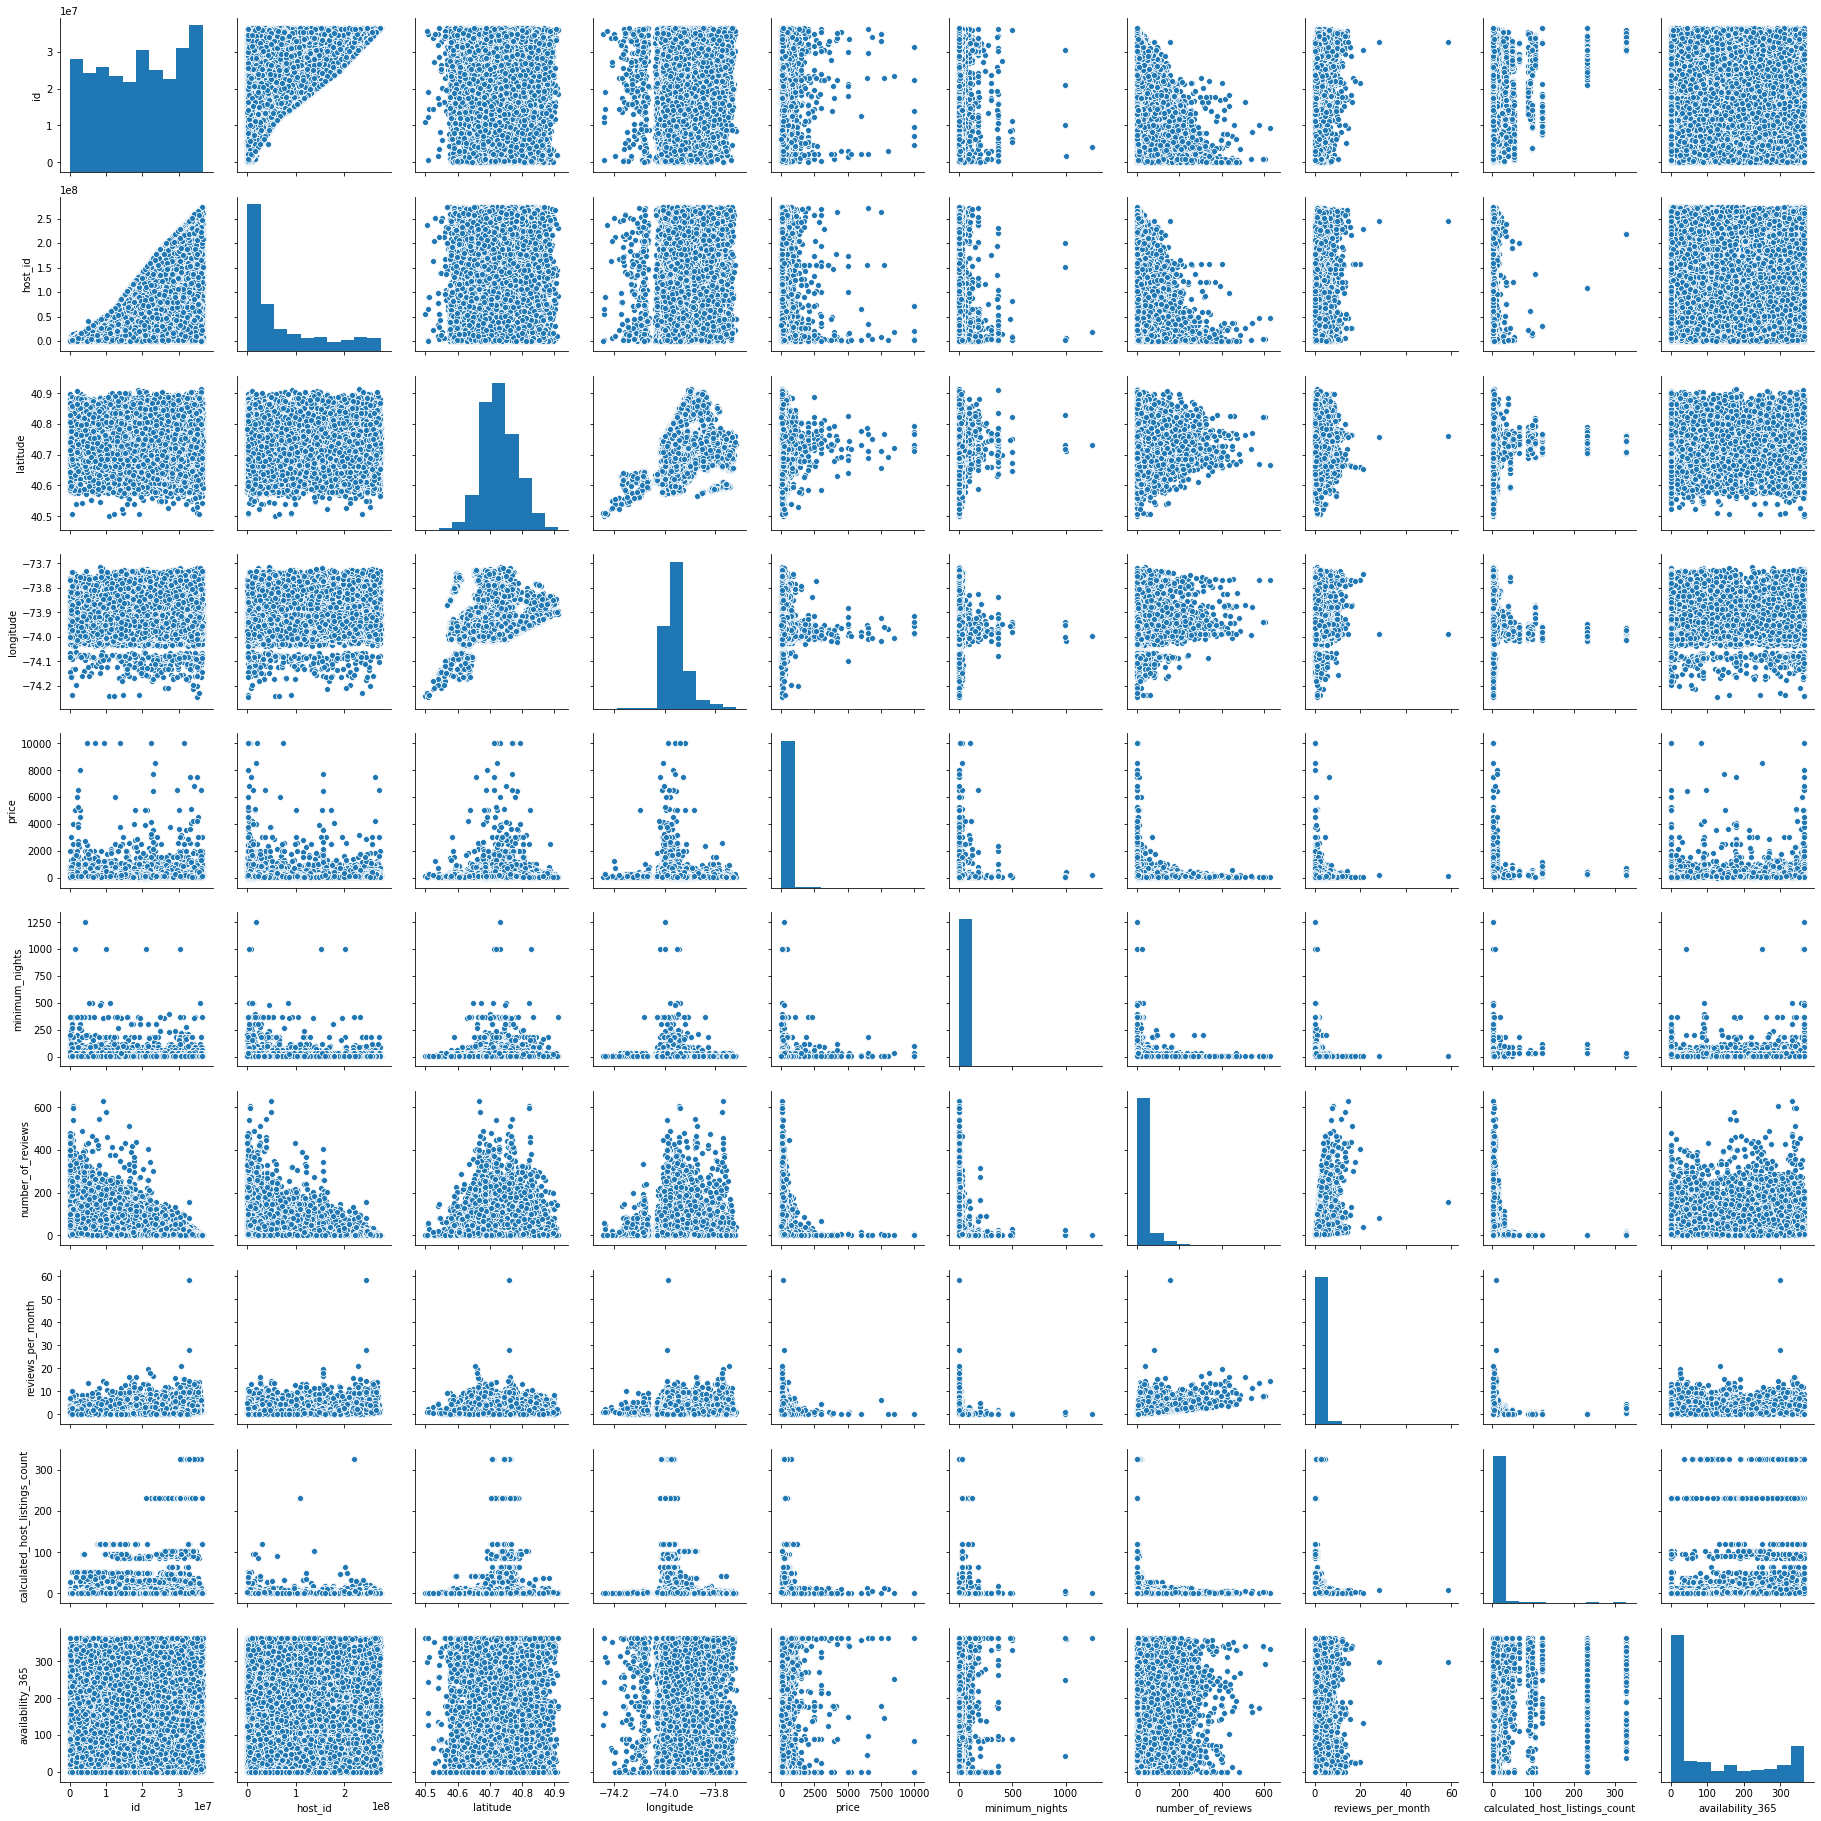

In [46]:
sns.pairplot(data)

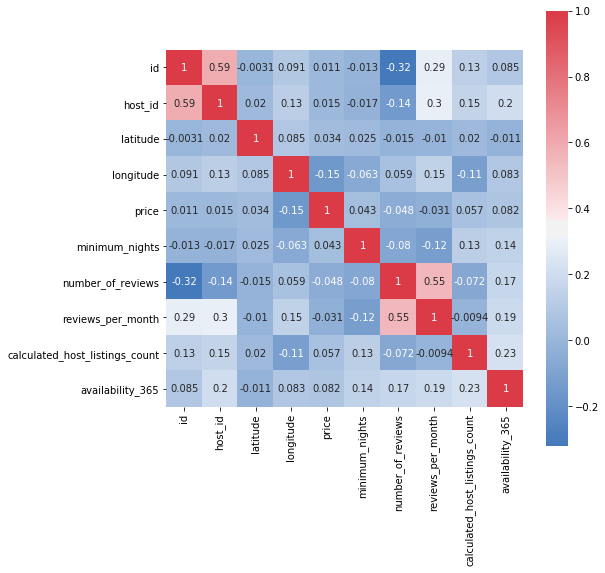

In [47]:
corr = data.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(8, 8))
sns.heatmap(corr, square=True, cmap=cmap, annot=True)

## The Tensorflow 2 Machine Learning Approaches

### Linear Regression

In [ ]:
class LinearModel:
    def __init__(self):
        # y_pred = W*X + b
        self.initializer = tf.keras.initializers.GlorotUniform()
    
    def loss(self, y, y_pred):
        return tf.reduce_mean(tf.abs(y - y_pred))
    
    def train(self, X, y, lr=0.00001, epochs=20, verbose=True):
            
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32).reshape((-1, 1)) # [1,2,3,4] -> [[1],[2],[3],[4]]
        
        self.W = tf.Variable(
            initial_value=self.initializer(shape=(len(X[0]), 1), dtype='float32'))
        self.b = tf.Variable(
            initial_value=self.initializer(shape=(1,), dtype='float32'))

        def train_step():
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            dW, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dW) # W -= lr * dW
            self.b.assign_sub(lr * db)
            
            return current_loss
        
        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') # <3 eager execution
                
    def predict(self, X):
        # [a, b] x [b, c]
        # X -> [n_instances, n_features], W -> [n_features, 1]
        return tf.matmul(X, self.W) + self.b

In [ ]:
model = LinearModel()
model.train(X_train, y_train, epochs=100)

## Multi Layer Perceptron (Artificial Neural Network)

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

In [49]:
sgd_optimizer = tf.keras.optimizers.SGD()
loss_fn = tf.keras.losses.MAE
model.compile(
    optimizer=sgd_optimizer,
    loss=loss_fn,
    metrics=[tf.keras.metrics.MAE]
)

In [50]:
model.fit(X_train, y_train, epochs=10)

Train on 34226 samples
Epoch 1/10
34226/34226 [==============================] - 3s 77us/sample - loss: 127.6463 - mean_absolute_error: 127.6464
Epoch 2/10
34226/34226 [==============================] - 2s 70us/sample - loss: 121.4694 - mean_absolute_error: 121.4694
Epoch 3/10
34226/34226 [==============================] - 2s 71us/sample - loss: 116.3151 - mean_absolute_error: 116.3152
Epoch 4/10
34226/34226 [==============================] - 2s 70us/sample - loss: 113.0980 - mean_absolute_error: 113.0980
Epoch 5/10
34226/34226 [==============================] - 2s 71us/sample - loss: 108.3260 - mean_absolute_error: 108.3260
Epoch 6/10
34226/34226 [==============================] - 2s 72us/sample - loss: 103.8063 - mean_absolute_error: 103.8063
Epoch 7/10
34226/34226 [==============================] - 2s 71us/sample - loss: 99.8396 - mean_absolute_error: 99.8396
Epoch 8/10
34226/34226 [==============================] - 2s 71us/sample - loss: 97.4305 - mean_absolute_error: 97.4305
Epoch

In [51]:
model.evaluate(X_test, y_test)

14669/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[95.59692128325982, 95.59693]

## Conclusions